**예제 1. Q-Learning 구성하기 (E-greedy 방식)**

**예제 2. 성능 평가**


*   게임 환경 생성

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import gym
from gym.envs.registration import register

register(
    id='FrozenLake-v3',
    entry_point = 'gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name':'4x4',
           'is_slippery':False}
)

env = gym.make('FrozenLake-v3')

/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


*   Q-Table & 파라미터 초기화

In [ ]:
Q = np.zeros([env.observation_space.n, env.action_space.n])

dis = 0.99
episode = 1000
rewardlist = []

*   Q-Learning with E-greedy

In [ ]:
for i in range(episode) : 
    state = env.reset()
    total_reward = 0
    done = False

    e = 1./((i / 100) + 1)

    while not done : 
        if np.random.rand(1) < e :
            action = env.action_space.sample()
        else : 
            action = np.argmax(Q[state, :])
        new_state, reward, done, _ = env.step(action)
        Q[state, action] = reward + dis * np.max(Q[new_state, :])
        total_reward += reward
        state = new_state
        
    rewardlist.append(total_reward)

*   성능 평가

Success : 0.622
Q-Table
[[0.94148015 0.95099005 0.93206535 0.94148015]
 [0.94148015 0.         0.         0.93206535]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.95099005 0.96059601 0.         0.94148015]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.96059601 0.         0.970299   0.95099005]
 [0.96059601 0.9801     0.9801     0.        ]
 [0.970299   0.99       0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.         0.         0.        ]
 [0.         0.9801     0.99       0.970299  ]
 [0.9801     0.99       1.         0.9801    ]
 [0.         0.         0.         0.        ]]


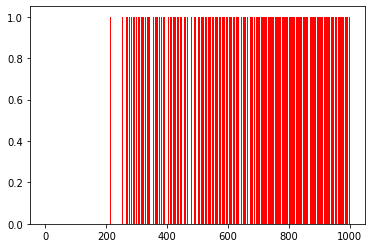

In [ ]:
print("Success : "+str(sum(rewardlist) / episode))
print("Q-Table")
print(Q)

plt.bar(range(len(rewardlist)), rewardlist, color="red")
plt.show()